In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy.signal as signal
import matplotlib.dates as mdates
import seaborn as sns
from scipy import interpolate
from tqdm import tqdm

# Data

* 미국 국채 - Price: t{} / Return: t{}_log
* 회사채 - Price: D{}AA / Return: D{}AA_log
* Emerging - Price: emerging / Return: emerging_log
* US - Price: us / Return: us_log
* Commodity - Price: com / Return: com_log
* Gold - Price: gold / Return: gold_log

In [4]:
# T-bill

t = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/US zero Price.csv')
t['Date'] = pd.to_datetime(t.Date)
t.set_index('Date', inplace = True)
t_log = np.log(t).diff(1)

In [5]:
# 회사채

d = ['A', 'B']

for i in d:
  daa = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/D{}AA.csv'.format(i))
  daa['DATE'] = pd.to_datetime(daa.DATE)
  daa.set_index('DATE', inplace = True)
  daa['D{}AA Price'.format(i)] = daa['D{}AA Price'.format(i)].astype(float, errors='raise')
  daa_log = np.log(daa).diff(1)
  daa_log.rename(columns={'D{}AA Price'.format(i):'D{}AA Log'.format(i)}, inplace=True)
  globals()['D{}AA'.format(i)] = daa
  globals()['D{}AA_log'.format(i)] = daa_log

In [6]:
# Emerging

emerging = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/iShares MSCI Emerging Markets ETF 2003-04-13.csv')
emerging = emerging[['Date', 'Adj Close']]
emerging['Date'] = pd.to_datetime(emerging.Date)
emerging.set_index('Date', inplace = True)
emerging.rename(columns={'Adj Close':'Emerging'}, inplace = True)

emerging_log = np.log(emerging).diff(1)
emerging_log.rename(columns={'Emerging':'Emerging Log'}, inplace=True)

In [7]:
# US

us = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/Wilshire 5000 1970-12-31.csv')
us = us.replace('.', np.NaN)
us['DATE'] = pd.to_datetime(us.DATE)
us.set_index('DATE', inplace = True)
us.rename(columns={'WILL5000IND':'US'}, inplace = True)
us['US'] = us['US'].astype(float, errors='raise')

us_log = np.log(us).diff(1)
us_log.rename(columns={'US':'US Log'}, inplace=True)

In [8]:
# Commodity

com = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/S&P GSCI Commodity Total Return Data 1979-12-27_PP.csv', thousands = ',')
com = com[['Date', 'Price']]
com['Date'] = pd.to_datetime(com.Date)
com.set_index('Date', inplace = True)
com.rename(columns={'Price':'Commodity'}, inplace = True)

com_log = np.log(com).diff(1)
com_log.rename(columns={'Commodity':'Commodity Log'}, inplace=True)

In [15]:
# Gold

gold = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/필라델피아 금은 Preprocessed.csv')
gold['Date'] = pd.to_datetime(gold.Date)
gold.set_index('Date', inplace = True)
gold.rename(columns={'필라델피아 금/은':'Gold'}, inplace = True)

gold_log = np.log(gold).diff(1)
gold_log.rename(columns={'Gold':'Gold Log'}, inplace=True)

In [16]:
price_list = [DAAA, DBAA, t, gold, emerging, com, us] 
ret_list = [DAAA_log, DBAA_log, t_log, gold_log, emerging_log, com_log, us_log] 

In [22]:
price = pd.concat(price_list, axis=1)
price

,DAAA Price,DBAA Price,SVENY01PRICE,SVENY02PRICE,SVENY03PRICE,SVENY04PRICE,SVENY05PRICE,SVENY06PRICE,SVENY07PRICE,SVENY08PRICE,...,SVENY25PRICE,SVENY26PRICE,SVENY27PRICE,SVENY28PRICE,SVENY29PRICE,SVENY30PRICE,Gold,Emerging,Commodity,US
1961-06-14,NaN,NaN,55.556054,51.465133,49.744640,48.879310,48.365286,48.026994,47.785957,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-15,NaN,NaN,55.431044,51.102066,49.313314,48.418487,47.888311,47.537944,47.289461,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-16,NaN,NaN,55.354676,51.097125,49.300940,48.397012,47.860625,47.505894,47.254856,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-19,NaN,NaN,55.422434,50.856600,49.056026,48.167955,47.642496,47.295839,47.049591,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-20,NaN,NaN,55.547423,51.137658,49.308554,48.397946,47.858780,47.502232,47.249394,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08,NaN,NaN,78.769016,71.950211,69.910281,69.540493,69.627960,69.704589,69.618388,69.355007,...,62.260546,62.044483,61.843695,61.656828,61.483754,61.321961,159.08,43.090000,4152.1602,NaN
2022-03-09,NaN,NaN,78.281803,71.347041,69.164609,68.682921,68.701798,68.747662,68.660008,68.415199,...,61.633963,61.422580,61.227489,61.044959,60.876063,60.717132,157.54,44.310001,NaN,NaN
2022-03-10,NaN,NaN,77.951567,70.860528,68.544215,67.973651,67.950985,67.993656,67.924331,67.706175,...,60.611814,60.372313,60.150221,59.943009,59.749355,59.567966,NaN,43.480000,NaN,NaN
2022-03-11,NaN,NaN,77.497201,70.423153,68.061720,67.484784,67.495372,67.593396,67.588093,67.433191,...,60.867750,60.646110,60.439461,60.247648,60.069354,59.902124,NaN,42.570000,NaN,NaN


In [23]:
ret = pd.concat(ret_list, axis=1)
ret

,DAAA Log,DBAA Log,SVENY01PRICE,SVENY02PRICE,SVENY03PRICE,SVENY04PRICE,SVENY05PRICE,SVENY06PRICE,SVENY07PRICE,SVENY08PRICE,...,SVENY25PRICE,SVENY26PRICE,SVENY27PRICE,SVENY28PRICE,SVENY29PRICE,SVENY30PRICE,Gold Log,Emerging Log,Commodity Log,US Log
1961-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-15,NaN,NaN,-0.002253,-0.007080,-0.008709,-0.009473,-0.009911,-0.010235,-0.010444,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-16,NaN,NaN,-0.001379,-0.000097,-0.000251,-0.000444,-0.000578,-0.000674,-0.000732,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-19,NaN,NaN,0.001223,-0.004718,-0.004980,-0.004744,-0.004568,-0.004431,-0.004353,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-20,NaN,NaN,0.002253,0.005511,0.005135,0.004763,0.004529,0.004354,0.004238,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08,NaN,NaN,-0.009785,-0.016710,-0.018829,-0.018844,-0.018196,-0.017470,-0.016879,-0.016463,...,-0.007756,-0.007266,-0.006796,-0.006346,-0.005915,-0.005524,0.009030,0.003254,0.027337,NaN
2022-03-09,NaN,NaN,-0.006205,-0.008418,-0.010723,-0.012409,-0.013391,-0.013823,-0.013862,-0.013643,...,-0.010115,-0.010074,-0.010014,-0.009973,-0.009933,-0.009912,-0.009728,0.027919,NaN,NaN
2022-03-10,NaN,NaN,-0.004227,-0.006842,-0.009010,-0.010380,-0.010989,-0.011028,-0.010773,-0.010418,...,-0.016723,-0.017247,-0.017751,-0.018216,-0.018682,-0.019108,NaN,-0.018909,NaN,NaN
2022-03-11,NaN,NaN,-0.005846,-0.006191,-0.007064,-0.007218,-0.006728,-0.005904,-0.004962,-0.004040,...,0.004214,0.004525,0.004797,0.005069,0.005341,0.005594,NaN,-0.021151,NaN,NaN


In [27]:
ret = ret['1979-12-30':'2022-02-28']
ret1 = ret[['US Log', 'Emerging Log', 'SVENY20PRICE', 'SVENY07PRICE', 'SVENY01PRICE', 'Commodity Log', 'Gold Log']]
ret1

,US Log,Emerging Log,SVENY20PRICE,SVENY07PRICE,SVENY01PRICE,Commodity Log,Gold Log
1979-12-31,0.000000,NaN,NaN,0.015807,0.035461,-0.004766,NaN
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,NaN,NaN,NaN,-0.027949,-0.025840,0.008470,NaN
1980-01-03,NaN,NaN,NaN,-0.007467,-0.015352,0.003892,NaN
1980-01-04,NaN,NaN,NaN,-0.010878,0.000824,-0.002377,NaN
...,...,...,...,...,...,...,...
2022-02-24,0.017024,-0.020861,-0.000215,0.007239,0.010402,0.013193,-0.019810
2022-02-25,0.022349,0.018329,-0.001954,-0.004218,-0.008187,-0.022683,0.017573
2022-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


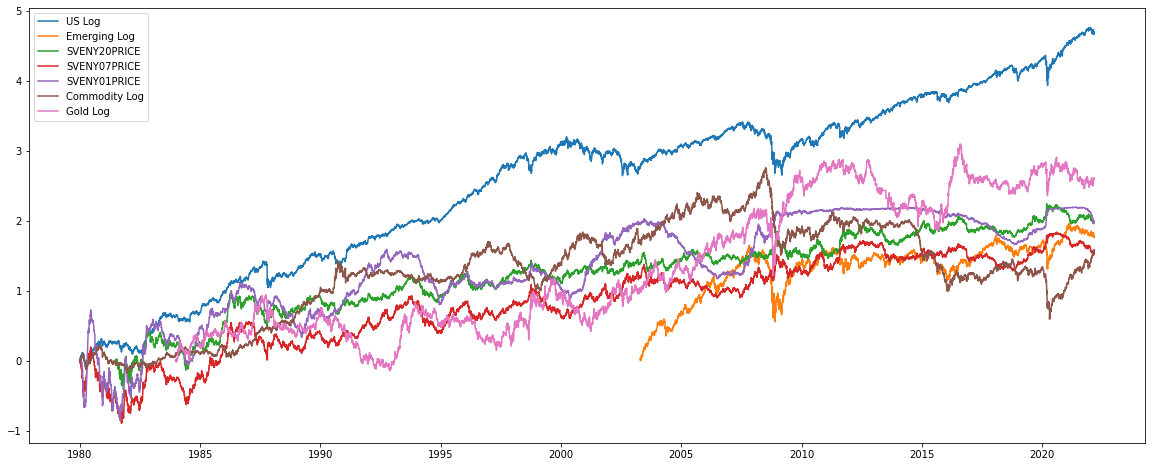

In [28]:
# Cumulative sum for log returns
cumreto = ret1.cumsum()

plt.figure(figsize=(20,8))
sns.lineplot(data=cumreto, dashes=False)

100%|██████████| 14/14 [05:16<00:00, 22.61s/it]


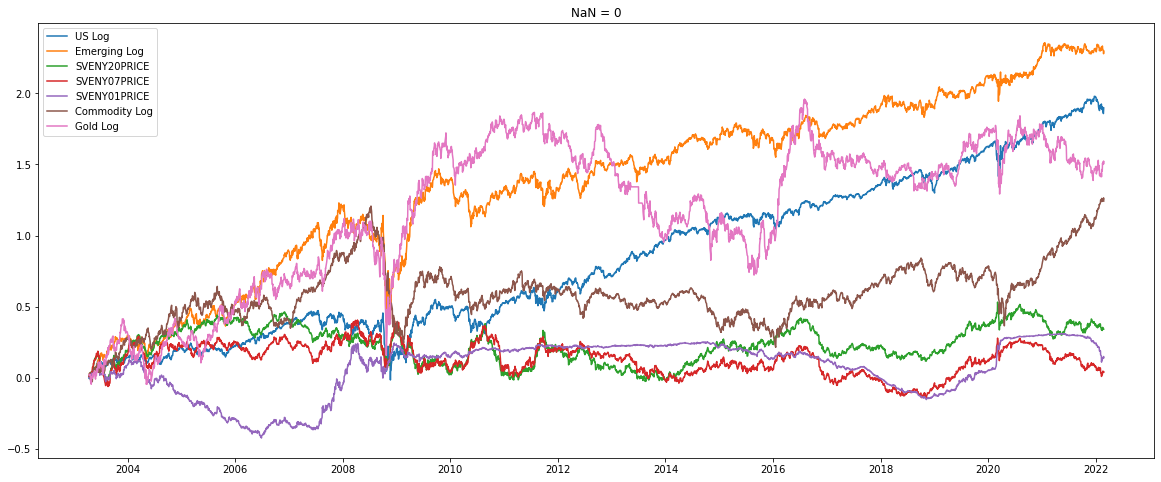

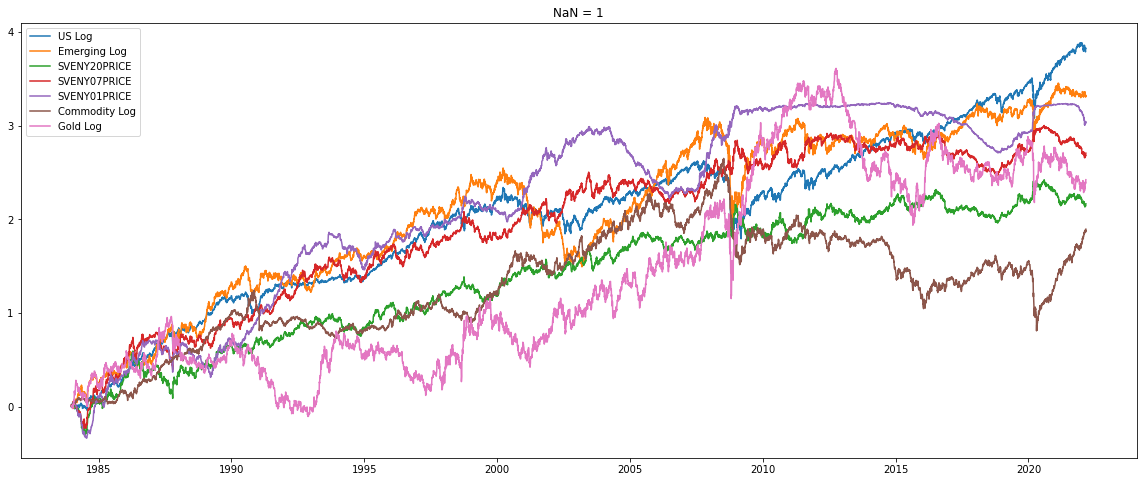

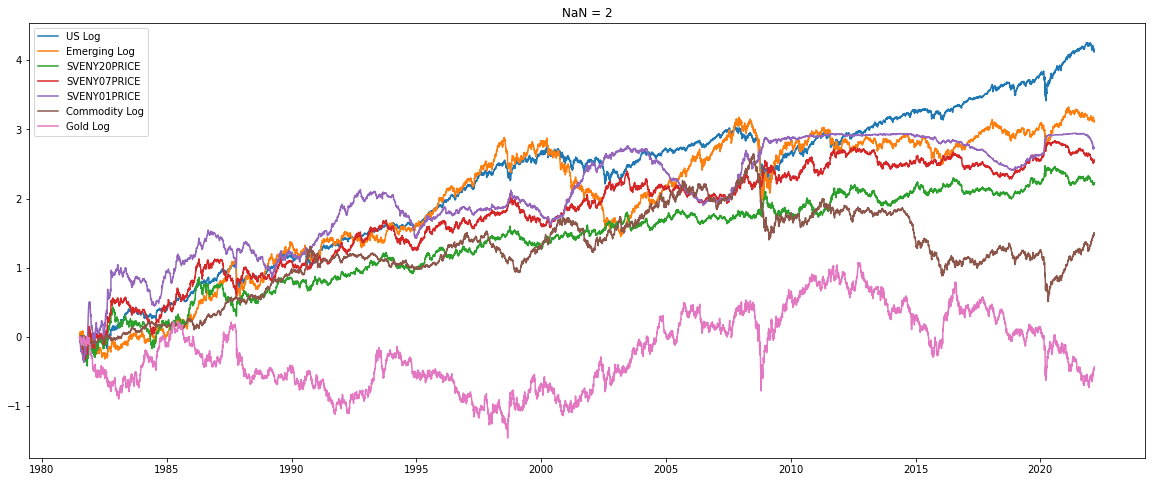

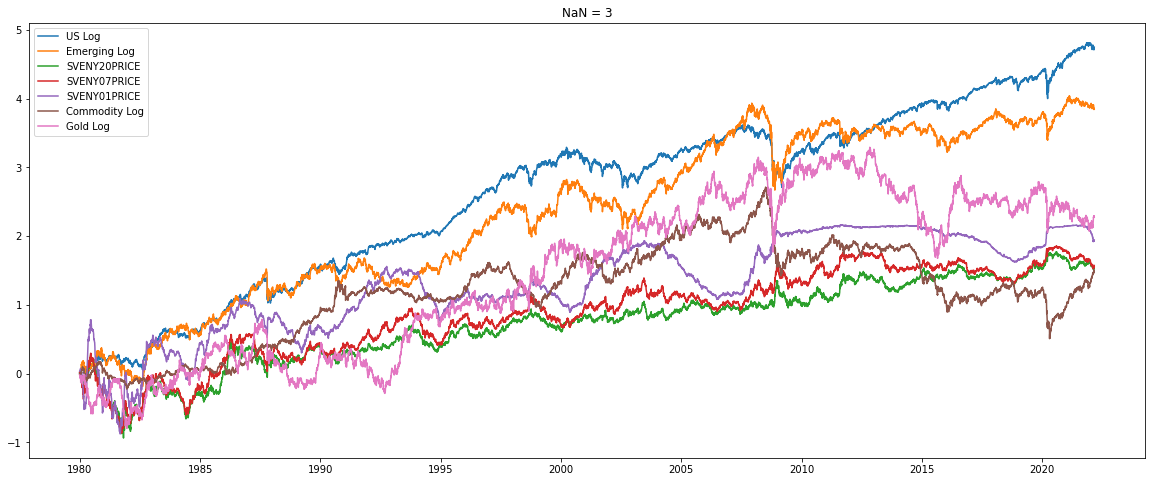

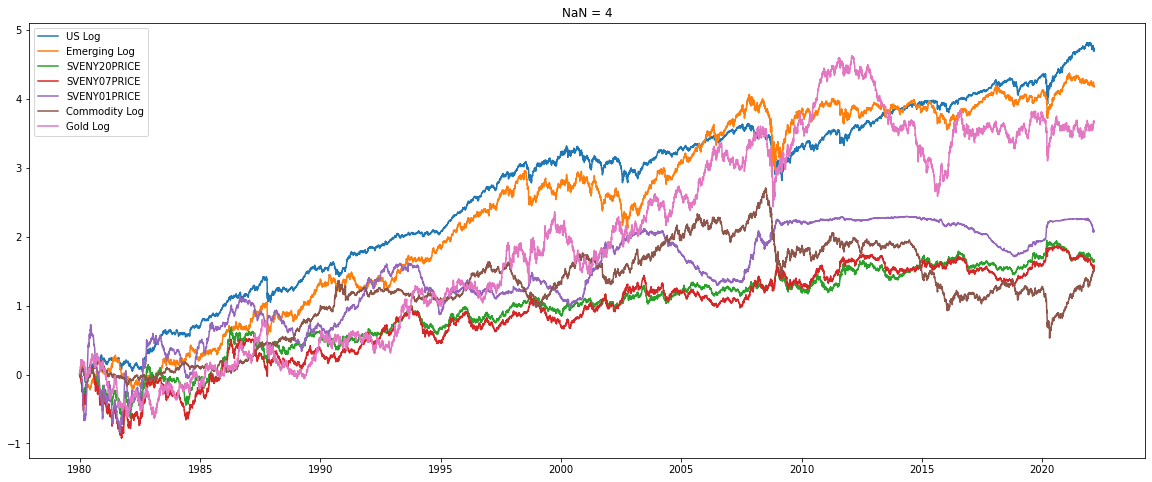

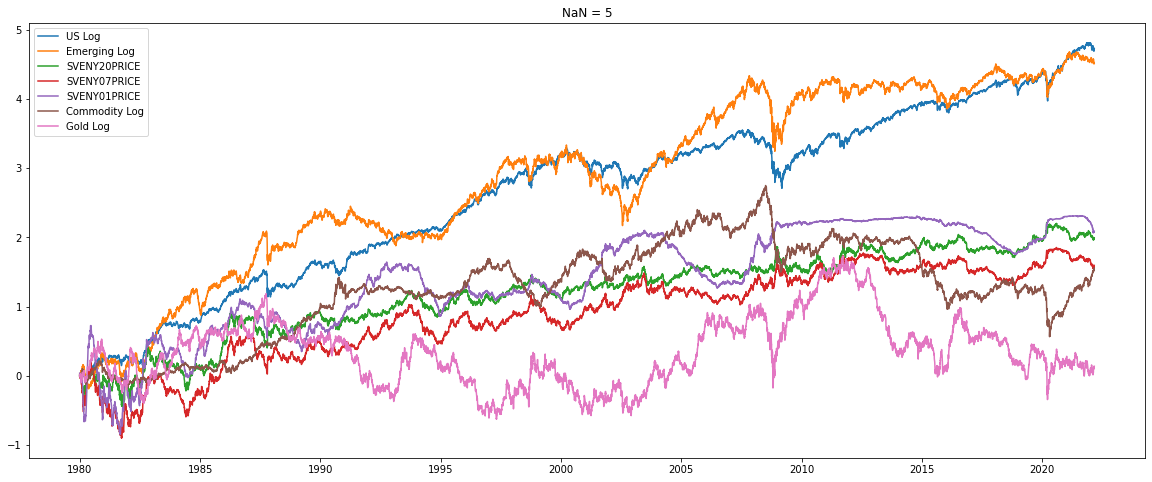

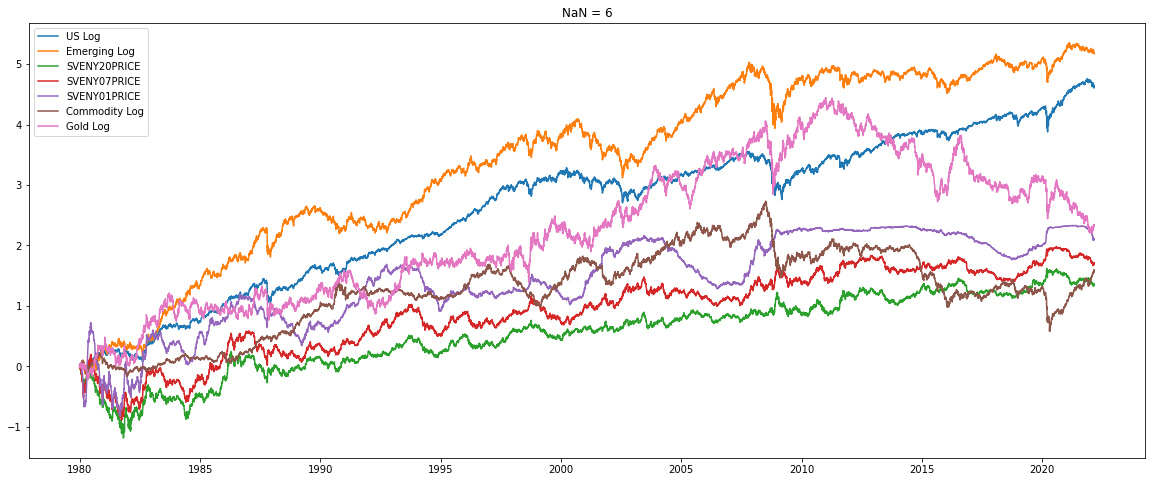

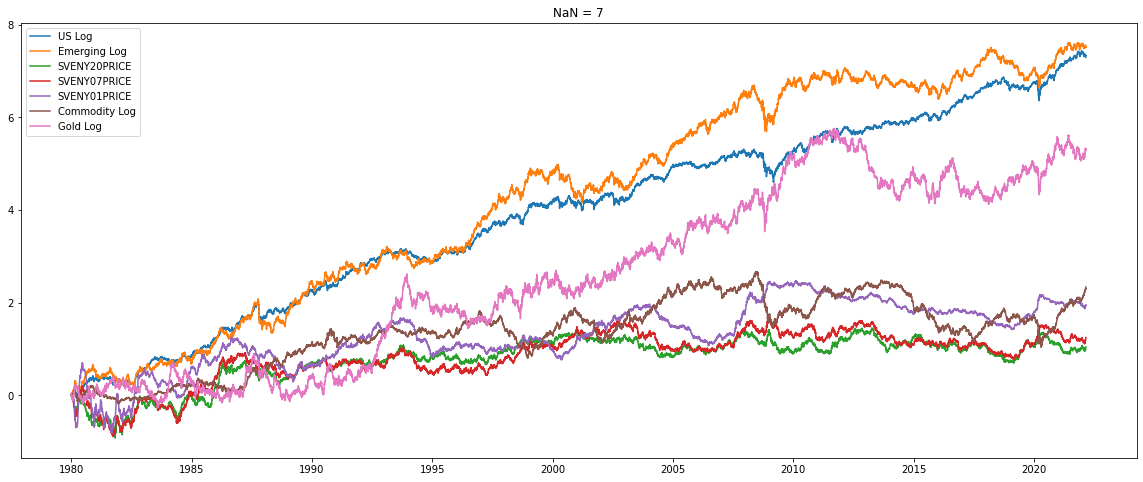

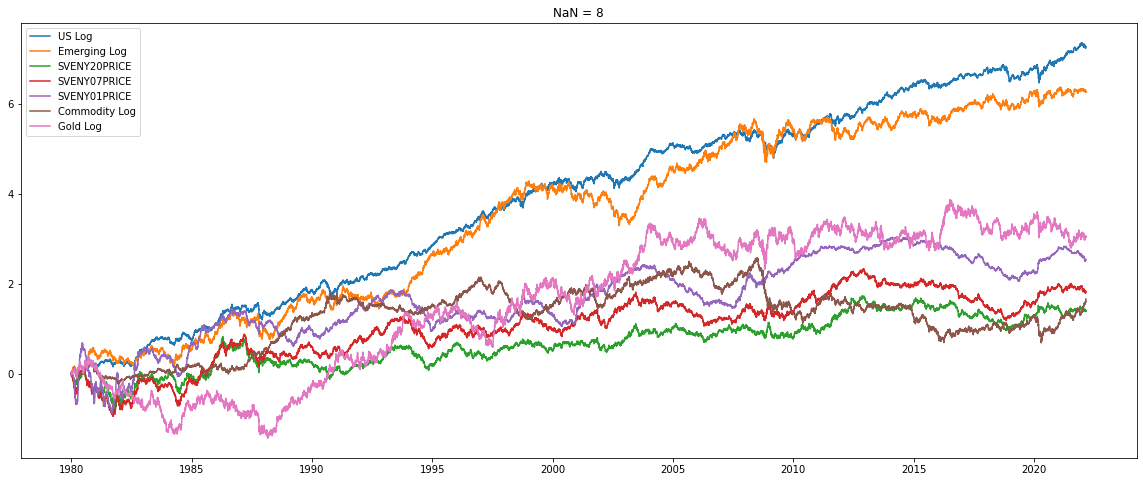

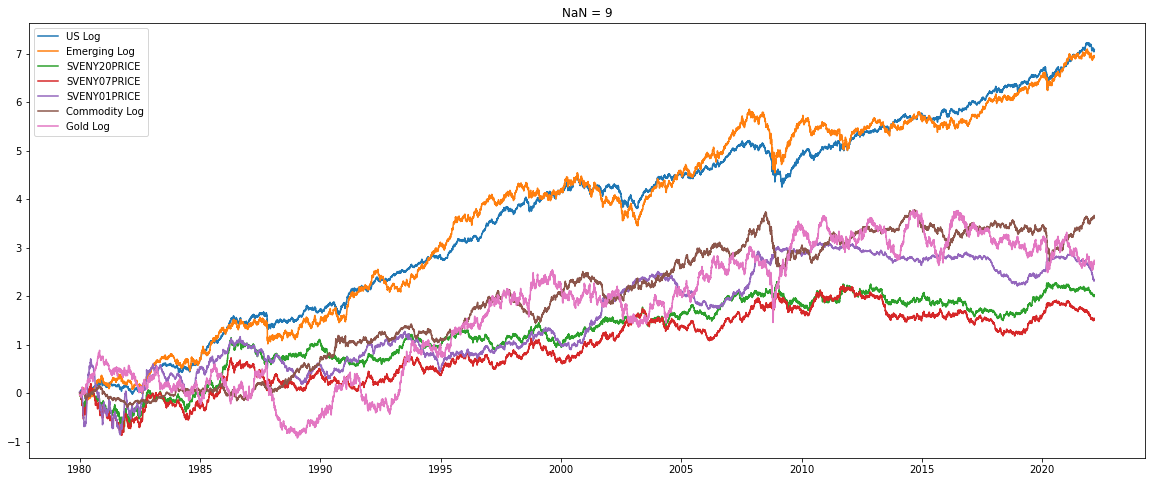

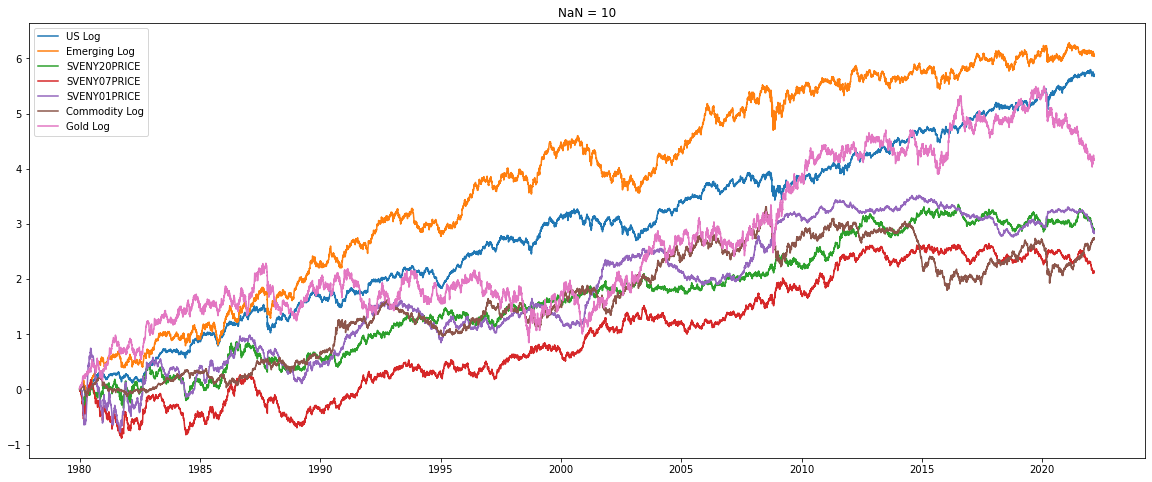

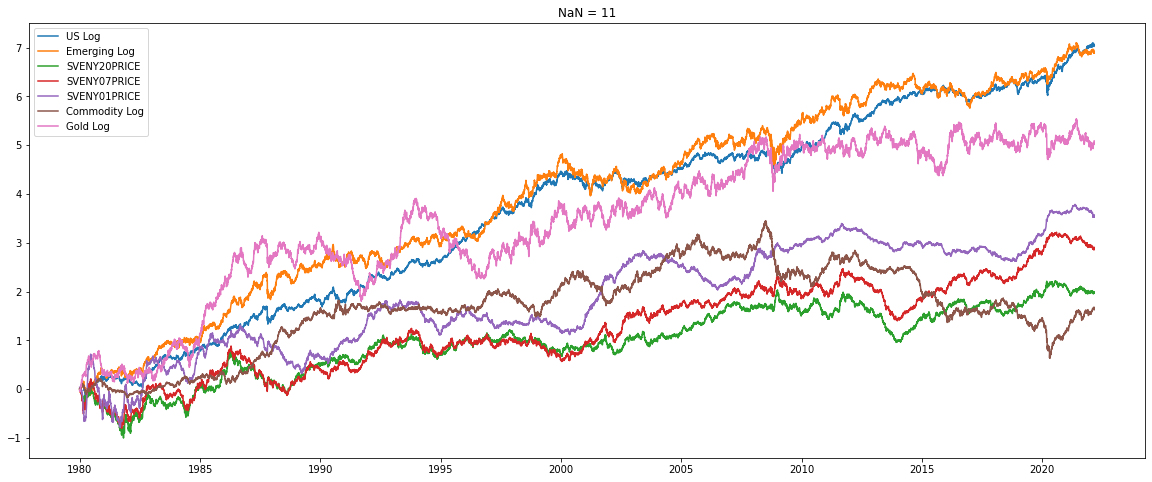

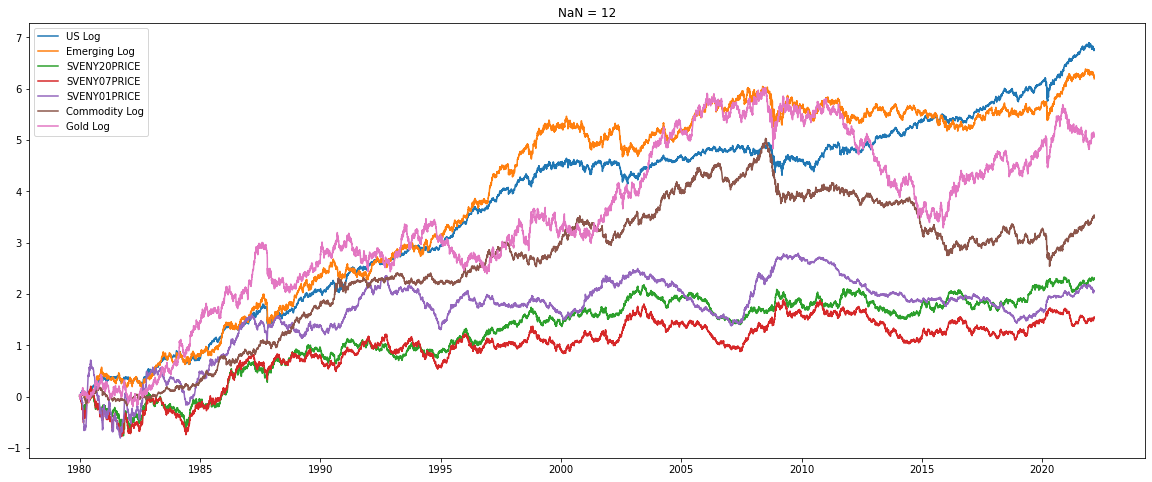

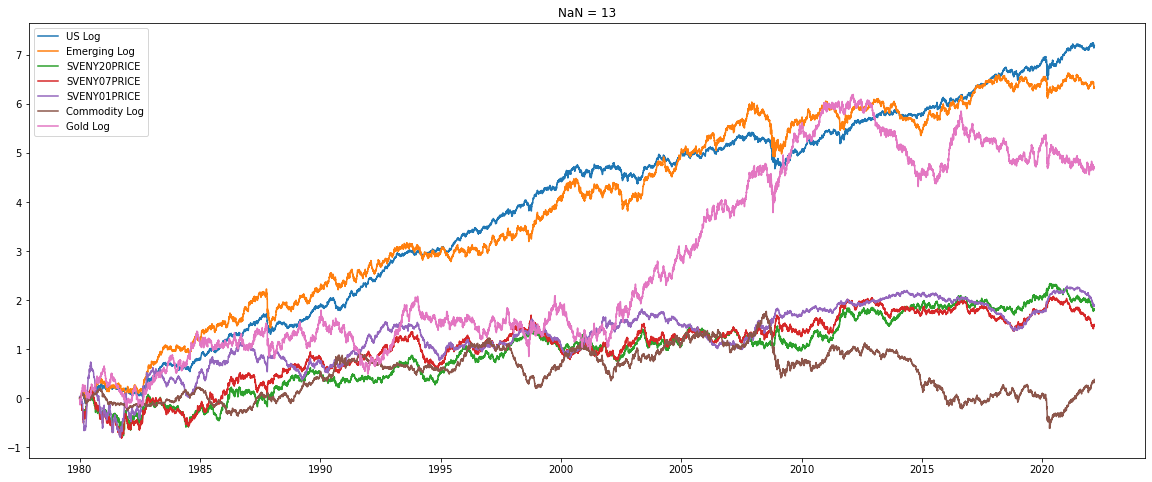

In [29]:
for j in tqdm(range(14)): # Number of NAs: 0 to 13

  na = ret1.copy()

  # Drop the row when the number of NA is more than j
  for i in na.index:
    if na.loc[i].isnull().sum() <= j:
      continue
    else:
      na.drop(i, inplace = True)       

  # Imputation
  imp = IterativeImputer(imputation_order='arabic', sample_posterior=True)
  imp.fit(na)
  ar_imp = imp.transform(na)

  # Array > DataFrame
  df_imp = pd.DataFrame(ar_imp, columns = na.columns, index = na.index)

  # Cumulative sum of log returns after imputation
  cumret = df_imp.cumsum()

  plt.figure(figsize=(20,8))
  sns.lineplot(data=cumret, dashes=False).set_title('NaN = {}'.format(j))

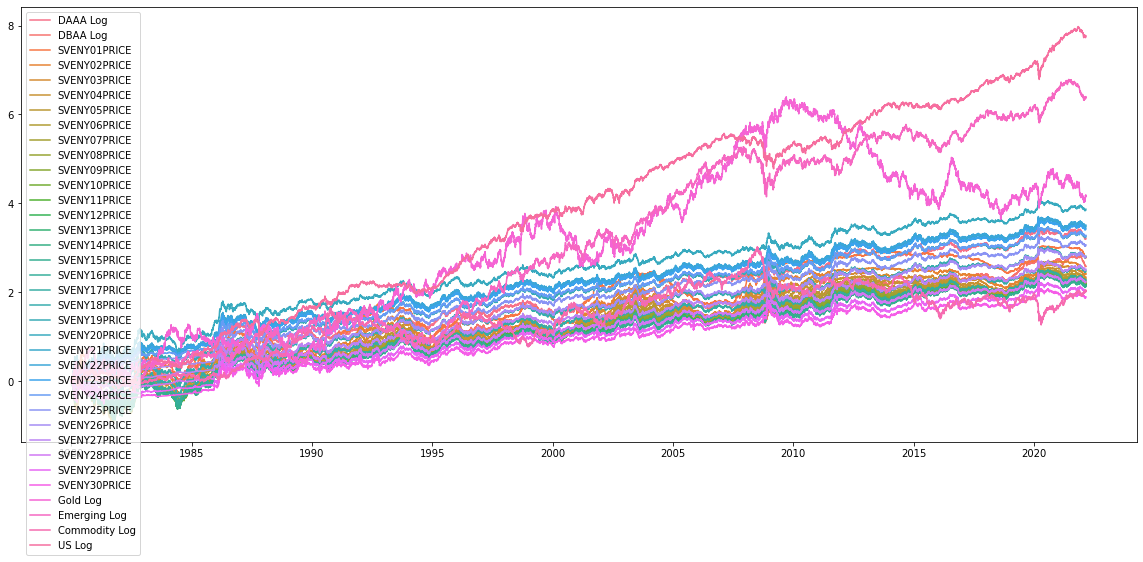

In [36]:
imp = IterativeImputer(imputation_order='arabic', sample_posterior=True)
imp.fit(ret)
ar_imp = imp.transform(ret)

# Array > DataFrame
df_imp = pd.DataFrame(ar_imp, columns = ret.columns, index = ret.index)

# Cumulative sum of log returns after imputation
cumret = df_imp.cumsum()

plt.figure(figsize=(20,8))
sns.lineplot(data=cumret, dashes=False)

In [37]:
df_imp

,DAAA Log,DBAA Log,SVENY01PRICE,SVENY02PRICE,SVENY03PRICE,SVENY04PRICE,SVENY05PRICE,SVENY06PRICE,SVENY07PRICE,SVENY08PRICE,...,SVENY25PRICE,SVENY26PRICE,SVENY27PRICE,SVENY28PRICE,SVENY29PRICE,SVENY30PRICE,Gold Log,Emerging Log,Commodity Log,US Log
1979-12-31,0.008328,0.011300,0.035461,0.014678,0.010657,0.012150,0.014398,0.015714,0.015807,0.014824,...,0.003676,0.002549,0.000907,-0.001333,-0.003879,-0.006771,0.015373,-0.010144,-0.004766,0.000000
1980-01-01,0.004503,0.002597,0.001512,0.000526,0.000154,0.000096,0.000120,0.000118,0.000144,0.000149,...,0.000278,0.000210,0.000186,0.000131,0.000095,0.000033,0.008138,0.020656,0.021558,0.009196
1980-01-02,-0.007192,-0.011415,-0.025840,-0.017223,-0.018266,-0.021934,-0.025281,-0.027310,-0.027949,-0.027456,...,0.004731,0.002013,-0.000320,-0.002580,-0.004081,-0.004483,0.018870,-0.020846,0.008470,-0.008522
1980-01-03,-0.018914,-0.027004,-0.015352,-0.012538,-0.008402,-0.005570,-0.004631,-0.005414,-0.007467,-0.010336,...,0.023335,0.014415,0.003916,-0.010005,-0.021199,-0.034685,-0.005520,-0.039190,0.003892,-0.021907
1980-01-04,0.002051,-0.000325,0.000824,-0.000144,-0.003747,-0.007201,-0.009531,-0.010715,-0.010878,-0.010313,...,-0.000838,-0.000699,-0.000382,0.000176,0.001053,0.002192,-0.011679,-0.001640,-0.002377,0.009149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,0.000000,-0.021124,0.010402,0.010552,0.010690,0.010348,0.009540,0.008458,0.007239,0.006021,...,-0.000664,-0.000722,-0.000781,-0.000820,-0.000878,-0.000917,-0.019810,-0.020861,0.013193,0.017024
2022-02-25,-0.001935,0.005759,-0.008187,-0.006163,-0.005975,-0.005891,-0.005516,-0.004926,-0.004218,-0.003550,...,-0.002343,-0.002401,-0.002460,-0.002518,-0.002576,-0.002634,0.017573,0.018329,-0.022683,0.022349
2022-02-26,-0.000288,-0.000465,-0.002096,-0.000958,-0.000187,0.000201,0.000241,0.000163,0.000087,0.000053,...,0.000045,0.000062,0.000107,0.000181,0.000310,0.000454,-0.026923,0.013249,0.006124,0.004581
2022-02-27,-0.003348,0.000515,0.001627,-0.001026,-0.000485,-0.000045,0.000123,0.000151,0.000125,0.000113,...,0.000179,0.000170,0.000208,0.000221,0.000221,0.000243,0.025770,0.017453,-0.020895,-0.000338


In [38]:
cumret

,DAAA Log,DBAA Log,SVENY01PRICE,SVENY02PRICE,SVENY03PRICE,SVENY04PRICE,SVENY05PRICE,SVENY06PRICE,SVENY07PRICE,SVENY08PRICE,...,SVENY25PRICE,SVENY26PRICE,SVENY27PRICE,SVENY28PRICE,SVENY29PRICE,SVENY30PRICE,Gold Log,Emerging Log,Commodity Log,US Log
1979-12-31,0.008328,0.011300,0.035461,0.014678,0.010657,0.012150,0.014398,0.015714,0.015807,0.014824,...,0.003676,0.002549,0.000907,-0.001333,-0.003879,-0.006771,0.015373,-0.010144,-0.004766,0.000000
1980-01-01,0.012830,0.013897,0.036974,0.015204,0.010811,0.012246,0.014519,0.015832,0.015951,0.014973,...,0.003954,0.002759,0.001093,-0.001202,-0.003784,-0.006738,0.023512,0.010512,0.016792,0.009196
1980-01-02,0.005638,0.002482,0.011133,-0.002019,-0.007455,-0.009688,-0.010763,-0.011478,-0.011998,-0.012483,...,0.008686,0.004772,0.000773,-0.003782,-0.007865,-0.011221,0.042382,-0.010335,0.025262,0.000674
1980-01-03,-0.013275,-0.024522,-0.004219,-0.014556,-0.015857,-0.015258,-0.015394,-0.016892,-0.019465,-0.022820,...,0.032021,0.019188,0.004689,-0.013788,-0.029064,-0.045906,0.036862,-0.049525,0.029154,-0.021234
1980-01-04,-0.011225,-0.024847,-0.003395,-0.014701,-0.019604,-0.022459,-0.024925,-0.027606,-0.030343,-0.033133,...,0.031183,0.018489,0.004307,-0.013612,-0.028011,-0.043714,0.025183,-0.051164,0.026777,-0.012084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,3.196664,2.574942,2.780172,2.408403,2.318539,2.253636,2.211584,2.188229,2.175446,2.167307,...,3.045161,2.783998,2.498593,2.221962,2.014390,1.876808,4.157467,6.353030,2.047463,7.744035
2022-02-25,3.194729,2.580701,2.771985,2.402240,2.312564,2.247745,2.206068,2.183303,2.171228,2.163757,...,3.042818,2.781596,2.496134,2.219444,2.011814,1.874174,4.175041,6.371360,2.024780,7.766384
2022-02-26,3.194442,2.580235,2.769889,2.401283,2.312378,2.247946,2.206309,2.183466,2.171315,2.163810,...,3.042864,2.781658,2.496241,2.219626,2.012123,1.874627,4.148117,6.384609,2.030903,7.770965
2022-02-27,3.191093,2.580751,2.771516,2.400256,2.311893,2.247901,2.206431,2.183617,2.171440,2.163922,...,3.043042,2.781828,2.496449,2.219847,2.012345,1.874870,4.173887,6.402061,2.010009,7.770627
